In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# import sklearn.preprocessing as preprocessing
# from sklearn.preprocessing import MaxAbsScaler

In [1]:
import data_process_funcs
import meta_dataframe_functions

In [ ]:
big_df =  meta_dataframe_functions.blank_meta_df()
meta_dataframe_functions.load_meta_df(big_df,'Hardware')

df_qubits = big_df[big_df['nr_qubits']==str(8)]


In [32]:

df_qubits.head(10)


,nr_qubits,backend,sim,circuit_type,file_path
6,8,brisbane,False,1,../Hardware_results/8q/8q_ibm_brisbane1.csv
7,8,brisbane,False,2,../Hardware_results/8q/8q_ibm_brisbane2.csv
8,8,brisbane,False,3,../Hardware_results/8q/8q_ibm_brisbane3.csv
9,8,torino,False,1,../Hardware_results/8q/8q_ibm_torino1.csv
10,8,torino,False,2,../Hardware_results/8q/8q_ibm_torino2.csv
11,8,torino,False,3,../Hardware_results/8q/8q_ibm_torino3.csv


In [33]:
print(len(df_qubits))

6


In [36]:
df_qubits.index

Index([6, 7, 8, 9, 10, 11], dtype='int64')

In [37]:
def get_expanded_df(type_data, nr_qubits):
    big_df =  meta_dataframe_functions.blank_meta_df()
    meta_dataframe_functions.load_meta_df(big_df,type_data)

    df_qubits = big_df[big_df['nr_qubits']==str(nr_qubits)]
    # df_qubits =meta_dataframe_functions.add_experiment_type_column(df_qubits)
    df_arr = []
    for i in df_qubits.index: #for each row
        df_ = data_process_funcs.create_processed_df(df_qubits.loc[i,'file_path'])
    
        default_vals = {
                'circuit_type': df_qubits.loc[i,'circuit_type'],
                'backend': df_qubits.loc[i,'backend'],
                'nr_qubits': df_qubits.loc[i,'nr_qubits'],
                'experiment_type': type_data
            }
        data = {}
        for col, val in default_vals.items():
            data[col] = [val] * len(df_)
        default_df = pd.DataFrame(data)
        df_ = pd.concat([default_df, df_], axis=1)
        df_arr.append(df_)

    df = pd.concat(df_arr)
    return df

In [88]:
def get_percentage_full_per_col(df):
    percentage_full_per_col = 100*df[df.columns[5:]].sum(0)/len(df)
    return percentage_full_per_col

def get_cols_with_full_percent(full_percent,df):
    full_cols = get_percentage_full_per_col(df)>= full_percent
    return full_cols

def get_number_of_cols_with_full_percent(full_percent,df):
    nr_full_cols = get_cols_with_full_percent(full_percent,df).sum(0)
    return nr_full_cols

In [38]:
df_4q_hardware = get_expanded_df('Hardware',4)
df_4q_sim = get_expanded_df('Simulation',4)
df_4q_Rsim = get_expanded_df('Refreshed_Simulation',4)

In [39]:
df_4q_all = pd.concat([df_4q_hardware,df_4q_sim,df_4q_Rsim])


In [40]:

df_4q_all.head()

,circuit_type,backend,nr_qubits,experiment_type,totalError,0000,0001,0010,0011,0100,...,0110,0111,1000,1001,1010,1011,1100,1101,1110,1111
0,1,brisbane,4,Hardware,674,1.0,0.583086,0.068249,0.040059,0.045994,...,0.002967,0.031157,0.097923,0.019288,0.000000,0.001484,0.000000,0.001484,0.004451,0.097923
1,1,brisbane,4,Hardware,609,1.0,0.504105,0.096880,0.054187,0.045977,...,0.004926,0.034483,0.103448,0.009852,0.000000,0.011494,0.003284,0.001642,0.003284,0.119869
2,1,brisbane,4,Hardware,563,1.0,0.470693,0.094139,0.042629,0.053286,...,0.005329,0.063943,0.115453,0.005329,0.000000,0.007105,0.005329,0.003552,0.007105,0.113677
3,1,brisbane,4,Hardware,671,1.0,0.520119,0.074516,0.037258,0.073025,...,0.005961,0.049180,0.120715,0.008942,0.004471,0.005961,0.010432,0.001490,0.000000,0.080477
4,1,brisbane,4,Hardware,700,1.0,0.562857,0.078571,0.030000,0.052857,...,0.002857,0.058571,0.087143,0.011429,0.001429,0.004286,0.002857,0.005714,0.001429,0.092857


In [42]:
df_8q_hardware = get_expanded_df('Hardware',8)
df_8q_sim = get_expanded_df('Simulation',8)
df_8q_Rsim = get_expanded_df('Refreshed_Simulation',8)
df_8q_all = pd.concat([df_8q_hardware,df_8q_sim,df_8q_Rsim])

In [44]:
df_8q_all.head(10)

,circuit_type,backend,nr_qubits,experiment_type,totalError,00000000,00000001,00000010,00000011,00000100,...,11110110,11110111,11111000,11111001,11111010,11111011,11111100,11111101,11111110,11111111
0,1,brisbane,8,Hardware,1742,1.0,0.276693,0.032147,0.018370,0.033869,...,0.000000,0.000000,0.000000,0.000574,0.0,0.0,0.00000,0.000000,0.000000,0.002296
1,1,brisbane,8,Hardware,1446,1.0,0.239281,0.035961,0.022822,0.093361,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.002075
2,1,brisbane,8,Hardware,1876,1.0,0.179638,0.029318,0.019190,0.049574,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000533,0.002132
3,1,brisbane,8,Hardware,1755,1.0,0.250142,0.022222,0.021652,0.063248,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00057,0.000000,0.000000,0.002849
4,1,brisbane,8,Hardware,1530,1.0,0.281046,0.033333,0.028758,0.048366,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.001307
5,1,brisbane,8,Hardware,1495,1.0,0.261538,0.038796,0.025418,0.055518,...,0.000000,0.000669,0.000000,0.000000,0.0,0.0,0.00000,0.000669,0.000000,0.002676
6,1,brisbane,8,Hardware,1521,1.0,0.260355,0.030901,0.017751,0.055884,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.002630
7,1,brisbane,8,Hardware,1489,1.0,0.269980,0.030222,0.017461,0.059100,...,0.000672,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.002015
8,1,brisbane,8,Hardware,1606,1.0,0.293275,0.033001,0.020548,0.069116,...,0.000000,0.000000,0.000623,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.004359
9,1,brisbane,8,Hardware,1227,1.0,0.152404,0.046455,0.040750,0.030155,...,0.000000,0.000815,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.004075


In [45]:
df_8q_all.tail(10)

,circuit_type,backend,nr_qubits,experiment_type,totalError,00000000,00000001,00000010,00000011,00000100,...,11110110,11110111,11111000,11111001,11111010,11111011,11111100,11111101,11111110,11111111
90,3,brisbane,8,Refreshed_Simulation,264,1.0,0.022727,0.227273,0.00000,0.147727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,3,brisbane,8,Refreshed_Simulation,260,1.0,0.038462,0.200000,0.00000,0.161538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,3,brisbane,8,Refreshed_Simulation,254,1.0,0.011811,0.181102,0.00000,0.149606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,3,brisbane,8,Refreshed_Simulation,294,1.0,0.017007,0.224490,0.00000,0.119048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,3,brisbane,8,Refreshed_Simulation,244,1.0,0.024590,0.188525,0.00000,0.159836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,3,brisbane,8,Refreshed_Simulation,286,1.0,0.017483,0.195804,0.00000,0.097902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,3,brisbane,8,Refreshed_Simulation,253,1.0,0.023715,0.241107,0.00000,0.126482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,3,brisbane,8,Refreshed_Simulation,237,1.0,0.016878,0.210970,0.00000,0.084388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,3,brisbane,8,Refreshed_Simulation,219,1.0,0.018265,0.196347,0.00000,0.146119,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,3,brisbane,8,Refreshed_Simulation,274,1.0,0.025547,0.200730,0.00365,0.171533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
percentage_full_cols = 100*df_8q_all[df_8q_all.columns[5:]].sum(0)/len(df_8q_all)
print(percentage_full_cols)

00000000    100.000000
00000001     10.913610
00000010     16.061957
00000011      1.379460
00000100     11.382034
               ...    
11111011      0.004706
11111100      0.000709
11111101      0.002749
11111110      0.006221
11111111      0.044690
Length: 256, dtype: float64


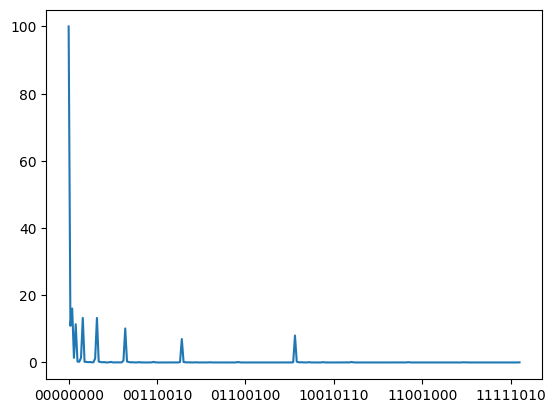

In [85]:
percentage_full_cols.plot()
plt.show()

In [86]:
print(percentage_full_cols.min())

4.2482973546772865e-05


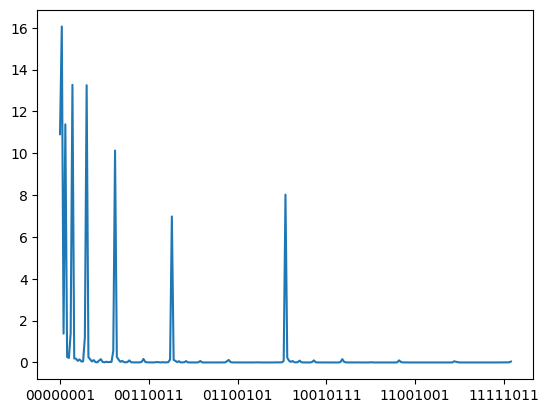

In [ ]:
#omit first col
percentage_full_cols[1:].plot()
plt.show()

In [89]:
print(get_number_of_cols_with_full_percent(10,df_8q_all))

7


In [90]:
print(get_number_of_cols_with_full_percent(1,df_8q_all))

12


In [92]:
print(get_number_of_cols_with_full_percent(0.1,df_8q_all))

32


In [93]:
print(get_number_of_cols_with_full_percent(0.01,df_8q_all))

82


In [91]:
print(get_number_of_cols_with_full_percent(0.001,df_8q_all))

181


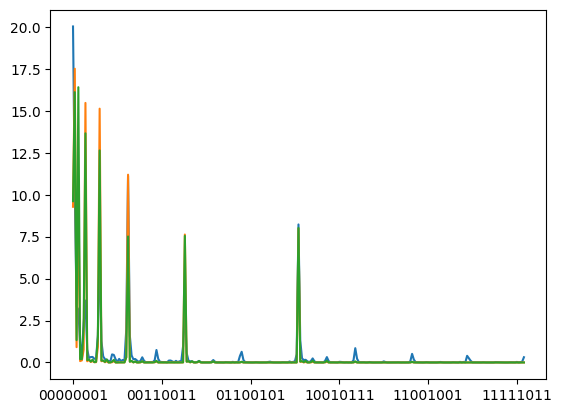

In [102]:
get_percentage_full_per_col(df_8q_hardware)[1:].plot()
get_percentage_full_per_col(df_8q_sim)[1:].plot()
get_percentage_full_per_col(df_8q_Rsim)[1:].plot()
plt.show()


In [104]:
torino_8q = df_8q_all[df_8q_all['backend']=='torino']
bris_8q = df_8q_all[df_8q_all['backend']=='brisbane']
fez_8q = df_8q_all[df_8q_all['backend']=='fez']
marr_8q = df_8q_all[df_8q_all['backend']=='marrakesh']


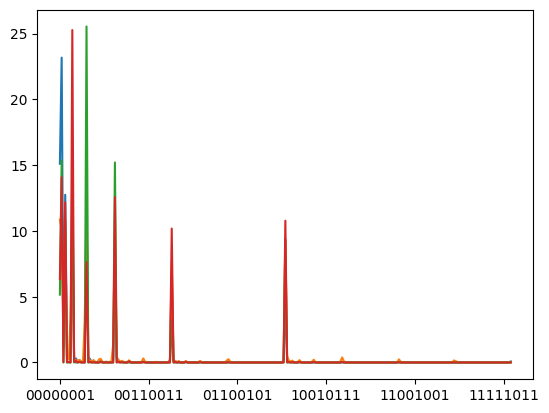

In [105]:
get_percentage_full_per_col(torino_8q)[1:].plot()
get_percentage_full_per_col(bris_8q)[1:].plot()
get_percentage_full_per_col(fez_8q)[1:].plot()
get_percentage_full_per_col(marr_8q)[1:].plot()
plt.show()